In [30]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent, plot_action_values

In [31]:
env = Maze()

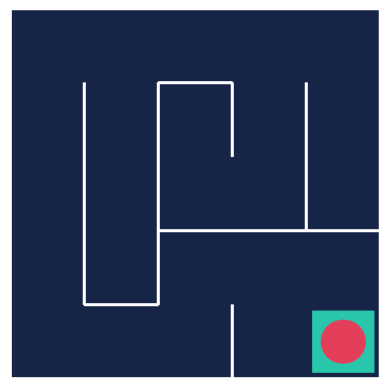

In [32]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [33]:
print(env.observation_space.nvec)
print(env.action_space.n)

[5 5]
4


In [34]:
action_values = np.zeros((5,5,4))

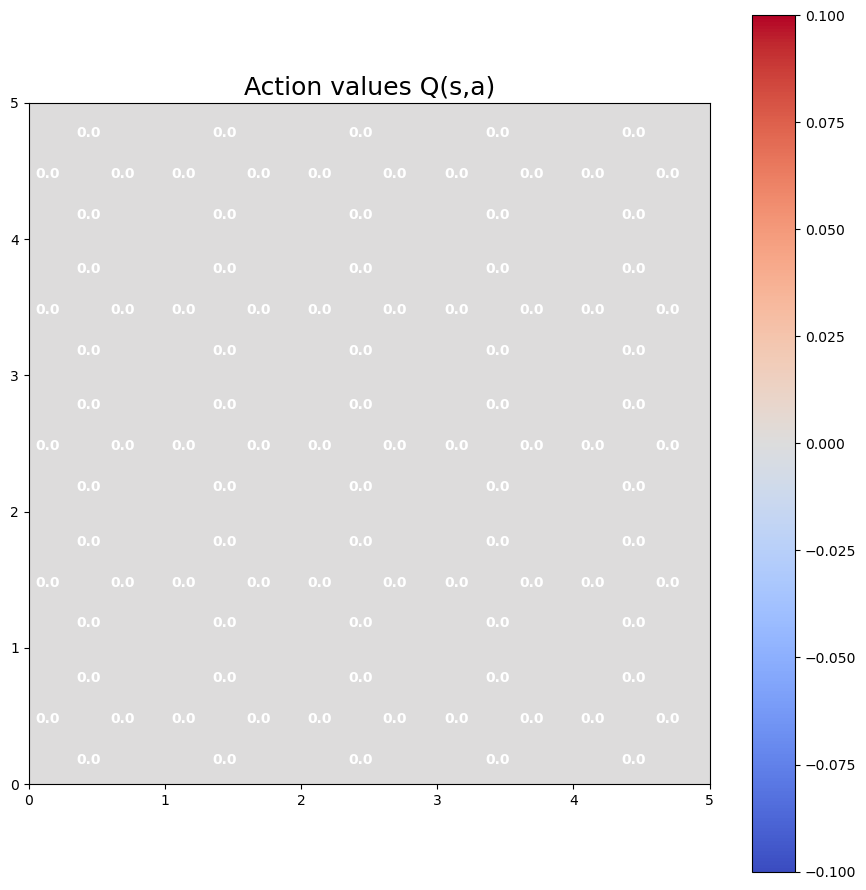

In [35]:
plot_action_values(action_values)

In [36]:
def policy(state, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))


In [37]:
action = policy((0,0), epsilon=0.5)
print(action)

0


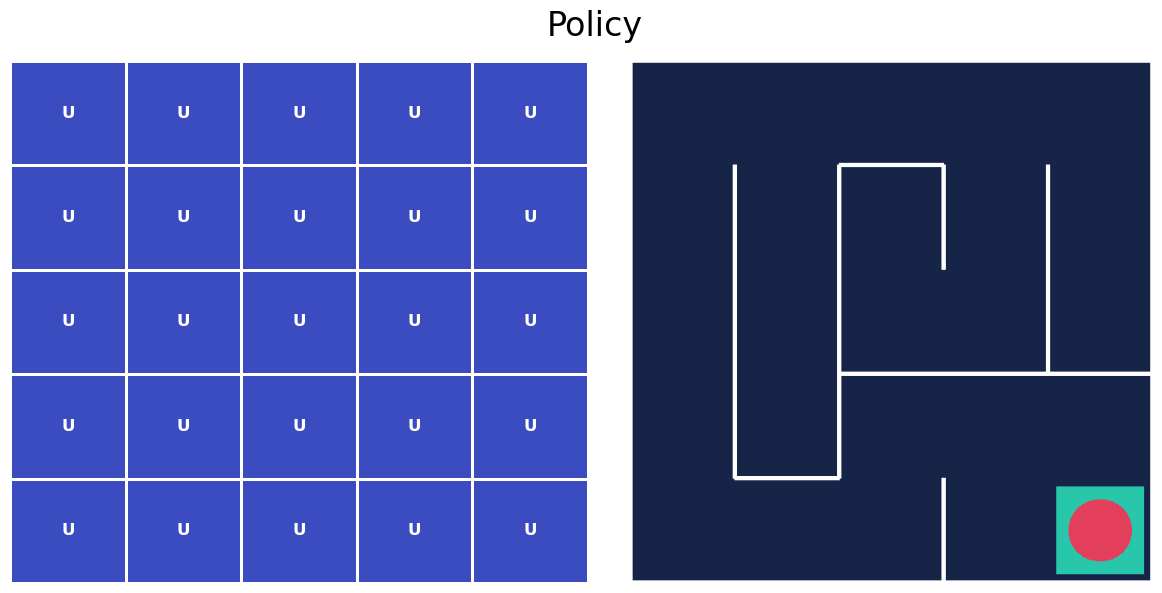

In [38]:
plot_policy(action_values, frame)

In [47]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):
    sa_returns = {}
    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transition = []
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transition.append([state, action, reward])
            state = next_state
        G = 0
        print(f"trans {transition}")
        for state_t, action_t, reward_t in reversed(transition):
            G = reward_t + gamma * G
            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            print(sa_returns)
            action_values[state_t][action_t] = np.mean(sa_returns[state_t, action_t])



In [48]:
on_policy_mc_control(policy, action_values, episodes=1)

trans [[(0, 0), 2, -1.0], [(1, 0), 2, -1.0], [(2, 0), 2, -1.0], [(3, 0), 2, -1.0], [(4, 0), 1, -1.0], [(4, 1), 1, -1.0], [(4, 2), 0, -1.0], [(3, 2), 1, -1.0], [(3, 3), 0, -1.0], [(3, 3), 2, -1.0], [(4, 3), 1, -1.0]]
{((4, 3), 1): [-1.0]}
{((4, 3), 1): [-1.0], ((3, 3), 2): [-1.99]}
{((4, 3), 1): [-1.0], ((3, 3), 2): [-1.99], ((3, 3), 0): [-2.9701]}
{((4, 3), 1): [-1.0], ((3, 3), 2): [-1.99], ((3, 3), 0): [-2.9701], ((3, 2), 1): [-3.9403989999999998]}
{((4, 3), 1): [-1.0], ((3, 3), 2): [-1.99], ((3, 3), 0): [-2.9701], ((3, 2), 1): [-3.9403989999999998], ((4, 2), 0): [-4.90099501]}
{((4, 3), 1): [-1.0], ((3, 3), 2): [-1.99], ((3, 3), 0): [-2.9701], ((3, 2), 1): [-3.9403989999999998], ((4, 2), 0): [-4.90099501], ((4, 1), 1): [-5.8519850599]}
{((4, 3), 1): [-1.0], ((3, 3), 2): [-1.99], ((3, 3), 0): [-2.9701], ((3, 2), 1): [-3.9403989999999998], ((4, 2), 0): [-4.90099501], ((4, 1), 1): [-5.8519850599], ((4, 0), 1): [-6.793465209301]}
{((4, 3), 1): [-1.0], ((3, 3), 2): [-1.99], ((3, 3), 0): [

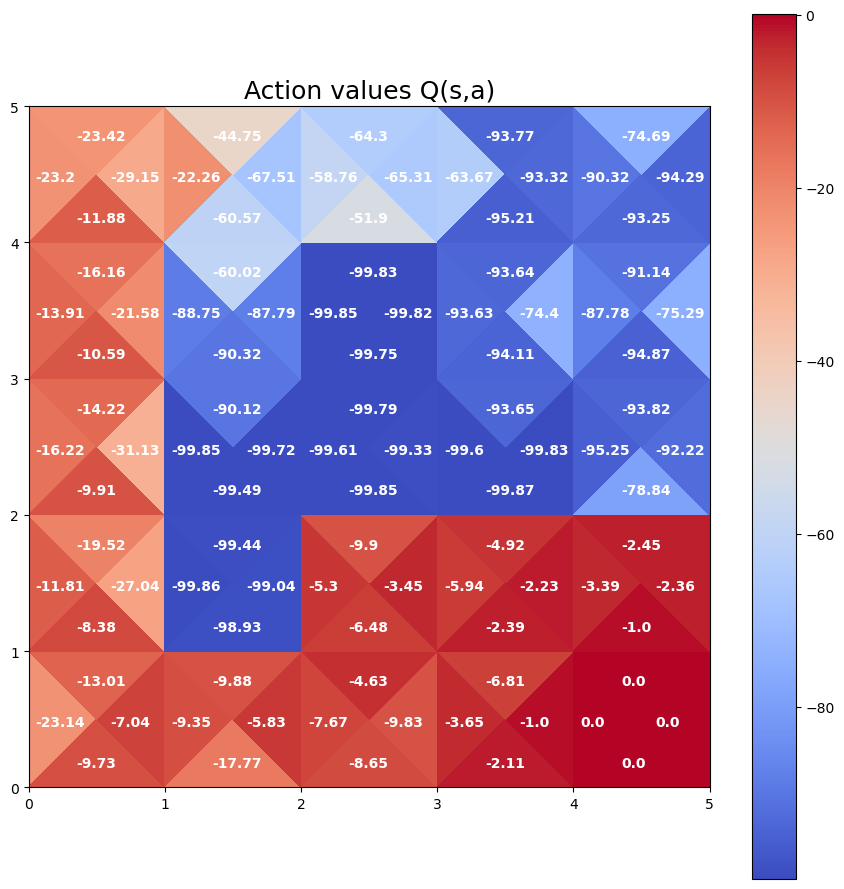

In [22]:
plot_action_values(action_values)

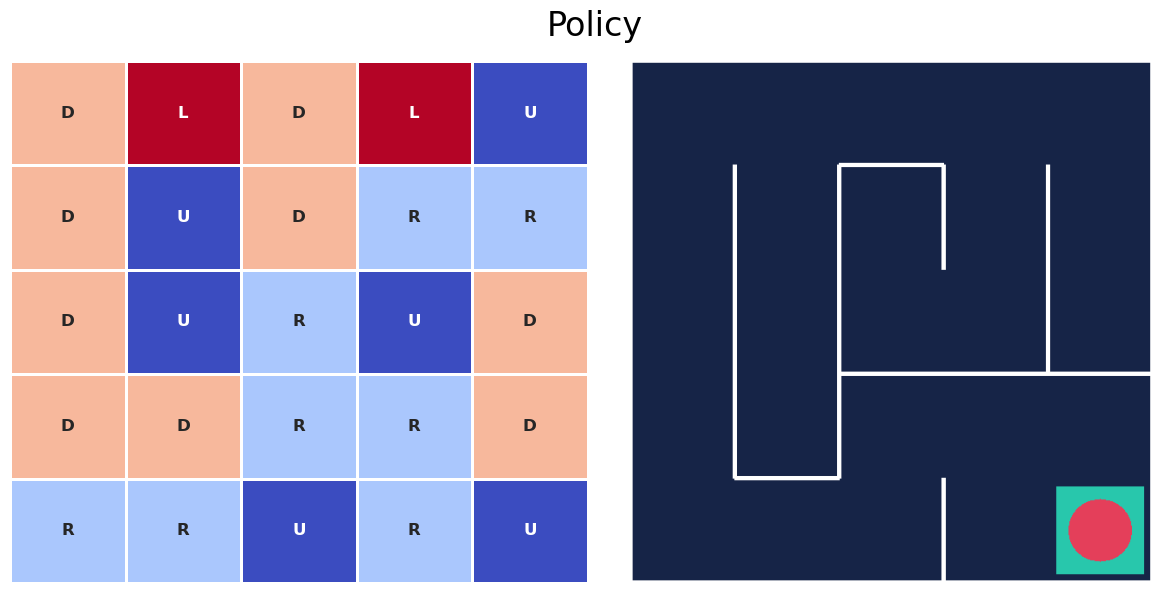

In [23]:
plot_policy(action_values, frame)

In [49]:
simple_dict = {}
simple_dict[(2,1), 1] = []
for i in range(3):
    simple_dict[(2,1),1].append(i)

In [50]:
simple_dict

{((2, 1), 1): [0, 1, 2]}